<a href="https://colab.research.google.com/github/BorisMejiasII/Hierarchical-Clustering/blob/main/Notebook_Tarea_Zoo_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

In [10]:
# ===============================
# Paso 1: Cargar el dataset
# ===============================

import pandas as pd

# URL raw de tu archivo zoo.csv en GitHub
url = 'https://raw.githubusercontent.com/BorisMejiasII/Hierarchical-Clustering/main/zoo.csv'

# Cargar el CSV directamente desde GitHub
df = pd.read_csv(url)

# Mostrar las primeras 5 filas para confirmar carga
df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
# Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)

# ===============================
# Paso 2: Preprocesamiento
#   - Eliminamos columnas no numéricas (animal_name y class_type)
#   - Escalamos las variables
# ===============================

from sklearn.preprocessing import StandardScaler

# 2.1. Separar atributos (X) del resto
#     Dejamos únicamente las columnas numéricas para clustering
X = df.drop(['animal_name', 'class_type'], axis=1)

# 2.2. Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos nuevamente a DataFrame (opcional, para inspección)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


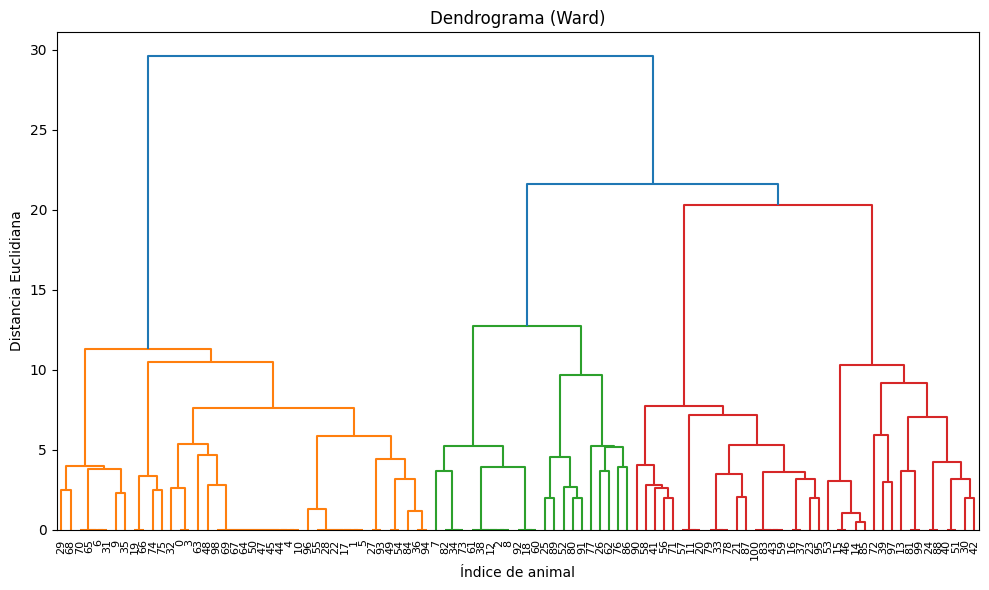

,animal_name,Cluster
0,aardvark,2
1,antelope,2
2,bass,4
3,bear,2
4,boar,2
5,buffalo,2
6,calf,5
7,carp,4
8,catfish,4
9,cavy,5


In [12]:
# Paso 3: Clustering Jerárquico

# ===============================
# Paso 3: Clustering Jerárquico
#   - Dibujar dendrograma
#   - Ajustar AgglomerativeClustering y asignar etiquetas de cluster
# ===============================

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# 3.1. Dendrograma (método Ward)
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward'),
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title("Dendrograma (Ward)")
plt.xlabel("Índice de animal")
plt.ylabel("Distancia Euclidiana")
plt.tight_layout()
plt.show()

# 3.2. Ajustar AgglomerativeClustering
#     Con linkage='ward' ya se usa métrica euclidiana por defecto,
#     así que no hace falta especificar 'metric' ni 'affinity'.
n_clusters = 7
hc = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'
)
y_hc = hc.fit_predict(X_scaled)

# 3.3. Añadir la columna 'Cluster' al DataFrame original
df['Cluster'] = y_hc

# 3.4. Mostrar algunos animales con su asignación de cluster
df[['animal_name', 'Cluster']].head(10)




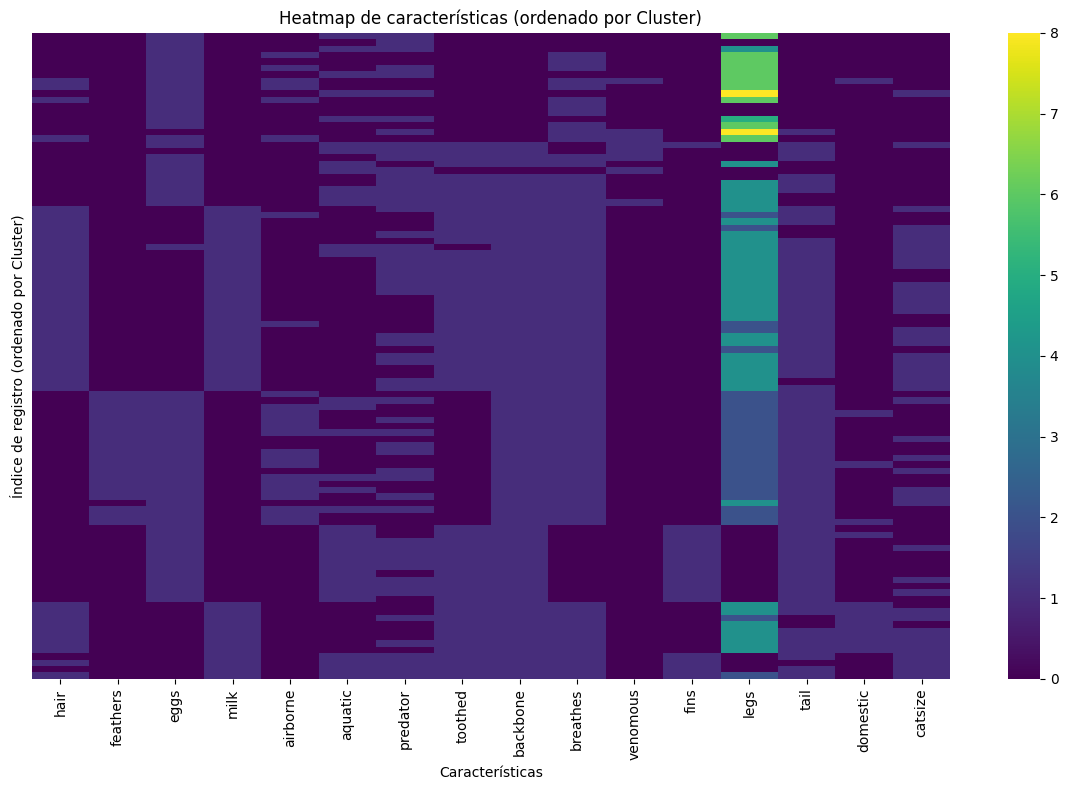

In [13]:
# Paso 4: Heatmap

# ===============================
# Paso 4: Heatmap de características por cluster
# ===============================

import seaborn as sns

# 4.1. Reordenar el DataFrame por el valor de 'Cluster'
df_clustered = df.sort_values(by='Cluster').reset_index(drop=True)

# 4.2. Creamos un DataFrame solo con las variables numéricas
# (sin animal_name, class_type ni Cluster)
X_clustered = df_clustered.drop(['animal_name', 'class_type', 'Cluster'], axis=1)

# 4.3. Dibujar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    X_clustered,
    cmap='viridis',
    cbar=True,
    xticklabels=True,
    yticklabels=False
)
plt.title("Heatmap de características (ordenado por Cluster)")
plt.xlabel("Características")
plt.ylabel("Índice de registro (ordenado por Cluster)")
plt.tight_layout()
plt.show()




# Conclusiones
Escribe aquí tus conclusiones sobre las agrupaciones obtenidas en el clustering jerárquico.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

Escribe tu respuesta aquí.

## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

Escribe tu respuesta aquí.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

Escribe tu respuesta aquí.

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

Escribe tu respuesta aquí.

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

Escribe tu respuesta aquí.

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

Escribe tu respuesta aquí.